<a href="https://colab.research.google.com/github/the-astronot/intro_to_ai/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Mass Imports
import torchvision
from torchvision import datasets, models, transforms
import os
import numpy as np
import torch
from torch.utils.data import Subset, ConcatDataset
import torch.optim as optim
from torch.optim import lr_scheduler
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import copy
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Homework5')
from classification import test, train
import model
os.chdir("drive/MyDrive/Homework5/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Homework 5

Convolutional Neural Nets

# Task 1

## Part 1

I chose to use the [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset to train my CNN on. Full disclosure: I was short on time, and this homework happened to coincide with another class in which I had to build a similar CNN, and some of the code is borrowed from that experience.

### Exploratory Data Analysis

I don't really have any analysis that I can perform. They're all images that fall into 1 of 10 categories. This is an established, cropped, and labeled dataset. I'm not sure what other analysis I can reasonably perform on it.

In [ ]:
def average(numbers):
  i = 0
  sum = 0.0
  for num in numbers:
    sum += num
    i+=1
  return sum/float(i)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# set hyper-parameters
train_batch_size = 100
test_batch_size = 100
n_epochs = 15
learning_rate = 1e-2
seed = 100
input_dim = (3,32,32)
out_dim = 10
momentum = 0.9

normalize = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.225, 0.225, 0.225])
train_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), normalize])
test_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), normalize])

train_dataset = torchvision.datasets.CIFAR10('./datasets/', train=True, download=True, transform=train_transforms)
test_dataset = torchvision.datasets.CIFAR10('./datasets/', train=False, download=True, transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)


# create neural network object
network = model.CNN_small(in_dim=input_dim, out_dim=out_dim)
network = network.to(device)

# set up optimizer
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

train_losses = []
test_losses = []
train_accs = []
test_accs = []

# training loop
for epoch in range(1, n_epochs + 1):
    train_loss, train_acc = train(network, train_loader, optimizer, epoch, device)
    train_accs.append(train_acc)
    train_losses.append(average(train_loss))
    test_loss, test_acc = test(network, test_loader, device)
    test_accs.append(test_acc)
    test_losses.append(test_loss)


Files already downloaded and verified
Files already downloaded and verified

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.304986

Train Epoch: 1 [10000/50000 (20%)]	Loss: 1.738178

Train Epoch: 1 [20000/50000 (40%)]	Loss: 1.470122

Train Epoch: 1 [30000/50000 (60%)]	Loss: 1.366305

Train Epoch: 1 [40000/50000 (80%)]	Loss: 1.372170
	Accuracy: 44.70%


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Avg. loss: -29600.4319, Accuracy: 5544/10000 (55.44%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.527337

Train Epoch: 2 [10000/50000 (20%)]	Loss: 1.154745

Train Epoch: 2 [20000/50000 (40%)]	Loss: 0.949500

Train Epoch: 2 [30000/50000 (60%)]	Loss: 0.860981

Train Epoch: 2 [40000/50000 (80%)]	Loss: 1.165232
	Accuracy: 61.49%
Test set: Avg. loss: -39448.7387, Accuracy: 6458/10000 (64.58%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 0.664556

Train Epoch: 3 [10000/50000 (20%)]	Loss: 0.685091

Train Epoch: 3 [20000/50000 (40%)]	Loss: 0.918418

Train Epoch: 3 [30000/50000 (60%)]	Loss: 0.932727

Train Epoch: 3 [40000/50000 (80%)]	Loss: 0.843868
	Accuracy: 72.02%
Test set: Avg. loss: -48825.9771, Accuracy: 6816/10000 (68.16%)

Train Epoch: 4 [0/50000 (0%)]	Loss: 0.620474

Train Epoch: 4 [10000/50000 (20%)]	Loss: 0.447688

Train Epoch: 4 [20000/50000 (40%)]	Loss: 0.507232

Train Epoch: 4 [30000/50000 (60%)]	Loss: 0.602743

Train Epoch: 4 [40000/50000 (80%)]	Loss: 0.622545
	Accuracy: 81.28%
Test

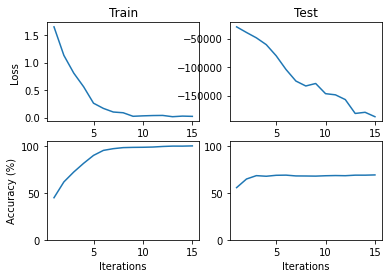

In [ ]:
x = [x+1 for x in range(len(train_losses))]
figs, axs = plt.subplots(2,2)
axs[0][0].plot(x,train_losses)
axs[0][1].plot(x,test_losses)
axs[1][0].plot(x,train_accs)
axs[1][1].plot(x,test_accs)
axs[0][0].set_title("Train")
axs[0][1].set_title("Test")
axs[0][0].set_ylabel("Loss")
axs[1][0].set_ylabel("Accuracy (%)")
axs[1][0].set_xlabel("Iterations")
axs[1][1].set_xlabel("Iterations")
axs[1][0].set_ylim(0,105)
axs[1][1].set_ylim(0,105)
plt.show()

## Part 2

I modified some [example code](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html) from the pytorch website in order to perform transfer learning on the cifar10 data.

In [ ]:
dataloaders = {"train": train_loader, "val": test_loader}
dataset_sizes = {"train": len(train_dataset), "val": len(test_dataset)}

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    accs = {"train": [], "val": []}
    losses = {"train": [], "val": []}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            losses[phase].append(float(epoch_loss))
            accs[phase].append(float(epoch_acc))

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return accs["train"], losses["train"], accs["val"], losses["val"]

In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 10)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=learning_rate, momentum=momentum)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
tl_train_accs, tl_train_losses, tl_test_accs, tl_test_losses = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

Epoch 0/14
----------
train Loss: 0.9326 Acc: 0.6872
val Loss: 0.6593 Acc: 0.7754

Epoch 1/14
----------
train Loss: 0.5588 Acc: 0.8110
val Loss: 0.6223 Acc: 0.7890

Epoch 2/14
----------
train Loss: 0.4110 Acc: 0.8600
val Loss: 0.5990 Acc: 0.8037

Epoch 3/14
----------
train Loss: 0.3198 Acc: 0.8904
val Loss: 0.6028 Acc: 0.8074

Epoch 4/14
----------
train Loss: 0.2574 Acc: 0.9107
val Loss: 0.6078 Acc: 0.8131

Epoch 5/14
----------
train Loss: 0.1999 Acc: 0.9318
val Loss: 0.5903 Acc: 0.8222

Epoch 6/14
----------
train Loss: 0.1668 Acc: 0.9425
val Loss: 0.7161 Acc: 0.8032

Epoch 7/14
----------
train Loss: 0.0699 Acc: 0.9773
val Loss: 0.6102 Acc: 0.8419

Epoch 8/14
----------
train Loss: 0.0329 Acc: 0.9905
val Loss: 0.6596 Acc: 0.8448

Epoch 9/14
----------
train Loss: 0.0216 Acc: 0.9941
val Loss: 0.7063 Acc: 0.8439

Epoch 10/14
----------
train Loss: 0.0155 Acc: 0.9959
val Loss: 0.7588 Acc: 0.8445

Epoch 11/14
----------
train Loss: 0.0123 Acc: 0.9971
val Loss: 0.7798 Acc: 0.8468

Ep

In [ ]:
for i in range(len(tl_train_accs)):
  tl_train_accs[i] *= 100
  tl_test_accs[i] *= 100

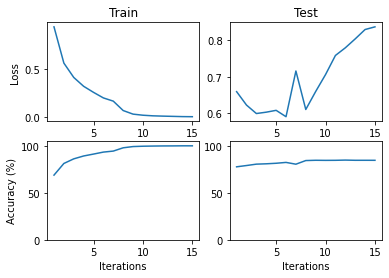

In [ ]:
y = [y+1 for y in range(len(tl_train_losses))]
figs, axs = plt.subplots(2,2)
axs[0][0].plot(y,tl_train_losses)
axs[0][1].plot(y,tl_test_losses)
axs[1][0].plot(y,tl_train_accs)
axs[1][1].plot(y,tl_test_accs)
axs[0][0].set_title("Train")
axs[0][1].set_title("Test")
axs[0][0].set_ylabel("Loss")
axs[1][0].set_ylabel("Accuracy (%)")
axs[1][0].set_xlabel("Iterations")
axs[1][1].set_xlabel("Iterations")
axs[1][0].set_ylim(0,105)
axs[1][1].set_ylim(0,105)
plt.show()

### Comparison

Using Transfer Learning based on ResNet18, I was able to achieve a higher level of accuaracy on the test set in the same number of iterations with similar parameters. This makes sense, as the pretrained model has been trained to idenitfy important distinctions from similar photos and labels. By comparison, my original model was relatively weak and was trained using relatively few images. Looking at the loss, this could be due to some overfitting.

## Part 3

For this part, I added copies of the data to the training. One of the copies is a blurred version of the original, and the other has had a "jitter" performed on it (brightness, contrast, saturation, and hue modifications). I didn't feel that this dataset would be changed sufficiently by simply flipping the images across the y axis, which led to this decision.

In [ ]:
blur = torchvision.transforms.GaussianBlur(3)
jitter = torchvision.transforms.ColorJitter(brightness=.05,contrast=0.05,saturation=0.05,hue=0.05)

blur_transforms = torchvision.transforms.Compose([normalize, blur])
jitter_transforms = blur_train_transforms = torchvision.transforms.Compose([jitter, normalize])

#new_train_transforms = ConcatDataset([train_transforms,blur_transforms,jitter_transforms])

blur_train_dataset = torchvision.datasets.CIFAR10('./datasets/', train=True, download=True, transform=blur_transforms)
jitter_train_dataset = torchvision.datasets.CIFAR10('./datasets/', train=True, download=True, transform=jitter_transforms)

new_train_dataset = ConcatDataset([train_dataset,blur_train_dataset,jitter_train_dataset])

new_train_loader = torch.utils.data.DataLoader(new_train_dataset, batch_size=train_batch_size, shuffle=True)


# create neural network object
new_network = model.CNN_small(in_dim=input_dim, out_dim=out_dim)
new_network = new_network.to(device)

# set up optimizer
optimizer = optim.SGD(new_network.parameters(), lr=learning_rate, momentum=momentum)

new_train_losses = []
new_test_losses = []
new_train_accs = []
new_test_accs = []

# training loop
for epoch in range(1, n_epochs + 1):
    train_loss, train_acc = train(new_network, train_loader, optimizer, epoch, device)
    new_train_accs.append(train_acc)
    new_train_losses.append(average(train_loss))
    test_loss, test_acc = test(new_network, test_loader, device)
    new_test_accs.append(test_acc)
    new_test_losses.append(test_loss)

Files already downloaded and verified
Files already downloaded and verified

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.299788

Train Epoch: 1 [10000/50000 (20%)]	Loss: 1.859188

Train Epoch: 1 [20000/50000 (40%)]	Loss: 1.317811

Train Epoch: 1 [30000/50000 (60%)]	Loss: 1.503634

Train Epoch: 1 [40000/50000 (80%)]	Loss: 1.454890
	Accuracy: 45.04%
Test set: Avg. loss: -29795.7204, Accuracy: 5546/10000 (55.46%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.163536

Train Epoch: 2 [10000/50000 (20%)]	Loss: 1.399370

Train Epoch: 2 [20000/50000 (40%)]	Loss: 1.055945

Train Epoch: 2 [30000/50000 (60%)]	Loss: 1.115488

Train Epoch: 2 [40000/50000 (80%)]	Loss: 1.027540
	Accuracy: 62.28%
Test set: Avg. loss: -37088.4837, Accuracy: 6316/10000 (63.16%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 0.906888

Train Epoch: 3 [10000/50000 (20%)]	Loss: 0.882280

Train Epoch: 3 [20000/50000 (40%)]	Loss: 0.824498

Train Epoch: 3 [30000/50000 (60%)]	Loss: 0.828499

Train Epoch: 3 [40000/50000 (80%)]	Loss: 0.790481
	Accuracy:

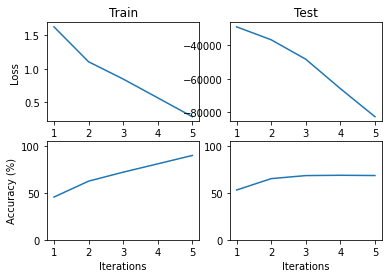

In [ ]:
z = [z+1 for z in range(len(train_losses))]
figs, axs = plt.subplots(2,2)
axs[0][0].plot(z,train_losses)
axs[0][1].plot(z,test_losses)
axs[1][0].plot(z,train_accs)
axs[1][1].plot(z,test_accs)
axs[0][0].set_title("Train")
axs[0][1].set_title("Test")
axs[0][0].set_ylabel("Loss")
axs[1][0].set_ylabel("Accuracy (%)")
axs[1][0].set_xlabel("Iterations")
axs[1][1].set_xlabel("Iterations")
axs[1][0].set_ylim(0,105)
axs[1][1].set_ylim(0,105)
plt.show()

### Comparison

After augmenting the data, the loss shoots up and takes longer to come back down. Similarly, the training accuracy takes longer to approach 100%. In contrast, I don't see much of an effect on the test accuracy, as this training produced another model with a test accuracy of roughly 70%.

# Task 2

I decided to use the fashion_mnist dataset for the second task, as its input dimensions are the same as the example mnist dataset.

## Part 1

In [20]:
import tensorflow as tf
import numpy as np
import time

In [59]:
class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=32, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=1, kernel_size=3, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits


In [60]:
optimizer = tf.keras.optimizers.Adam(1e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))


In [61]:
epochs = 10
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 2
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])

def generate_and_save_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  #plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()


In [62]:
batch_size = 32
train_size = 50000
test_size = 10000

(train_images, _), (test_images, _) = tf.keras.datasets.fashion_mnist.load_data()

def preprocess_images(images):
  images = images.reshape((images.shape[0], 28, 28, 1)) / 255.
  return np.where(images > .5, 1.0, 0.0).astype('float32')

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)


train_dataset = (tf.data.Dataset.from_tensor_slices(train_images)
                 .shuffle(train_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(test_size).batch(batch_size))

In [63]:
tmodel = CVAE(latent_dim)

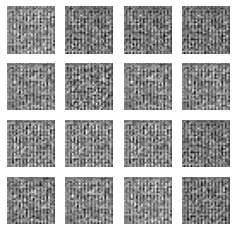

Epoch: 1, Test set ELBO: -226.1807861328125, time elapse for current epoch: 6.3948822021484375


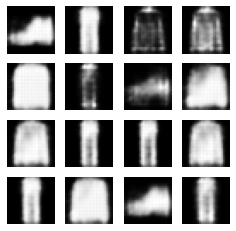

Epoch: 2, Test set ELBO: -211.8627166748047, time elapse for current epoch: 5.319225549697876


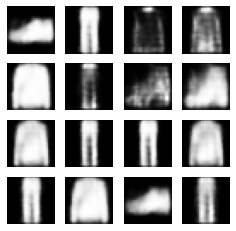

Epoch: 3, Test set ELBO: -205.836669921875, time elapse for current epoch: 5.089418649673462


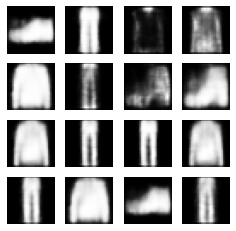

Epoch: 4, Test set ELBO: -202.1443634033203, time elapse for current epoch: 5.1323840618133545


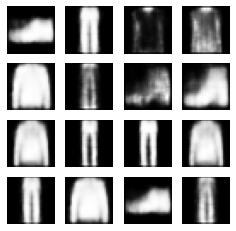

Epoch: 5, Test set ELBO: -199.40476989746094, time elapse for current epoch: 5.0901243686676025


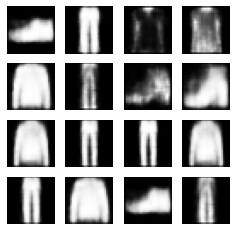

Epoch: 6, Test set ELBO: -197.0103759765625, time elapse for current epoch: 6.001448631286621


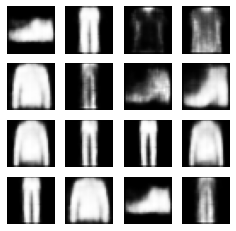

Epoch: 7, Test set ELBO: -195.3152313232422, time elapse for current epoch: 5.094434976577759


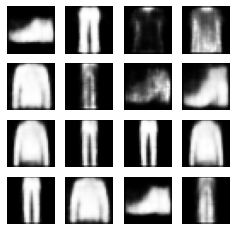

Epoch: 8, Test set ELBO: -194.47325134277344, time elapse for current epoch: 5.0996832847595215


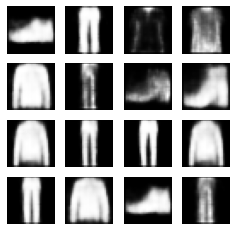

Epoch: 9, Test set ELBO: -193.9396209716797, time elapse for current epoch: 5.057448387145996


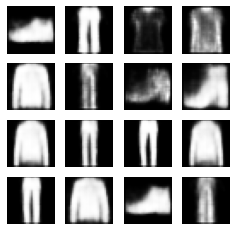

Epoch: 10, Test set ELBO: -192.3109130859375, time elapse for current epoch: 5.036900520324707


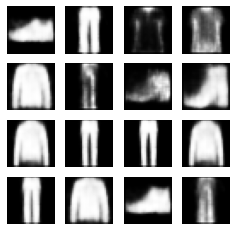

In [64]:
# Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]


generate_and_save_images(tmodel, 0, test_sample)

for epoch in range(1, epochs + 1):
  start_time = time.time()
  for train_x in train_dataset:
    train_step(tmodel, train_x, optimizer)
  end_time = time.time()

  loss = tf.keras.metrics.Mean()
  for test_x in test_dataset:
    loss(compute_loss(tmodel, test_x))
  elbo = -loss.result()
  print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))
  generate_and_save_images(tmodel, epoch, test_sample)


## Part 2

In [42]:
from tensorflow.keras import layers

In [43]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [45]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

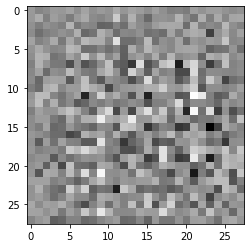

In [65]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [66]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model


In [67]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)


tf.Tensor([[-0.00201696]], shape=(1, 1), dtype=float32)


In [68]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)


In [69]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss


In [70]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)


In [71]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


In [72]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)


In [73]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])


In [74]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


In [77]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    #display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  #display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)


In [76]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  #plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()


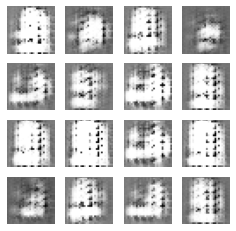

Time for epoch 1 is 88.40881419181824 sec


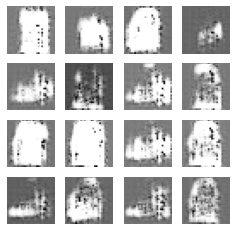

Time for epoch 2 is 89.76161694526672 sec


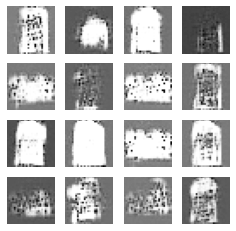

Time for epoch 3 is 90.96736598014832 sec


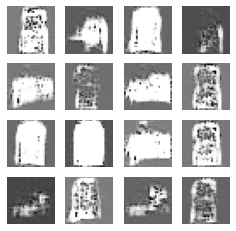

Time for epoch 4 is 91.62153220176697 sec


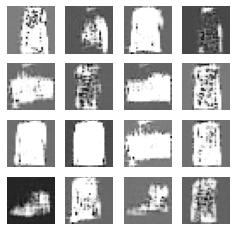

Time for epoch 5 is 91.63377833366394 sec


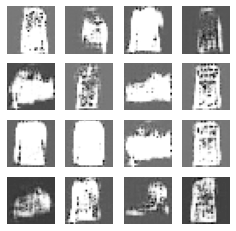

Time for epoch 6 is 91.64720129966736 sec


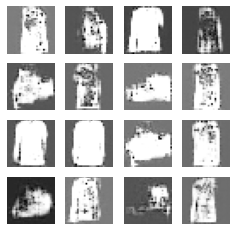

Time for epoch 7 is 91.79181146621704 sec


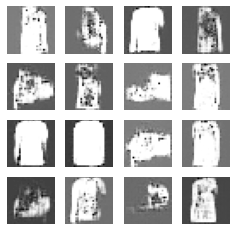

Time for epoch 8 is 91.79406952857971 sec


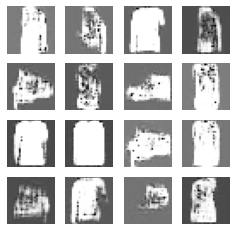

Time for epoch 9 is 91.41570591926575 sec


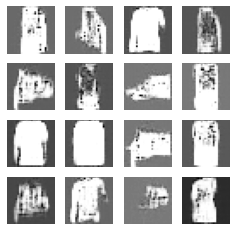

Time for epoch 10 is 91.51290249824524 sec


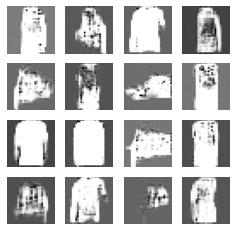

Time for epoch 11 is 91.65436148643494 sec


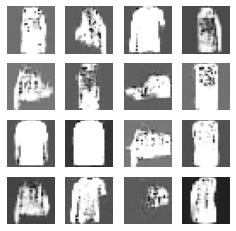

Time for epoch 12 is 91.97342991828918 sec


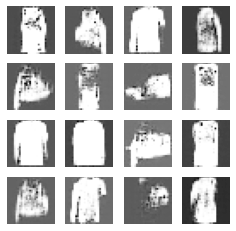

Time for epoch 13 is 91.64270257949829 sec


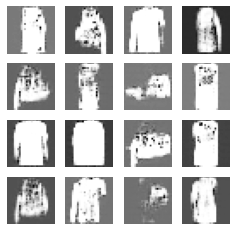

Time for epoch 14 is 91.7396788597107 sec


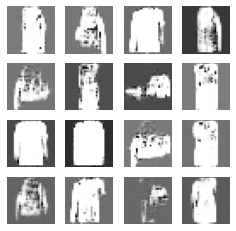

Time for epoch 15 is 91.75665211677551 sec


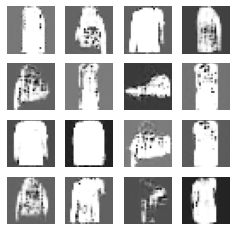

Time for epoch 16 is 91.83799576759338 sec


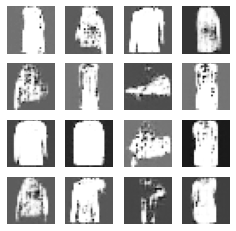

Time for epoch 17 is 91.71751856803894 sec


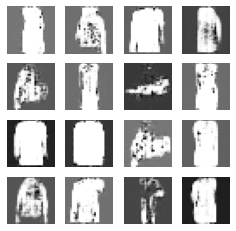

Time for epoch 18 is 91.78632831573486 sec


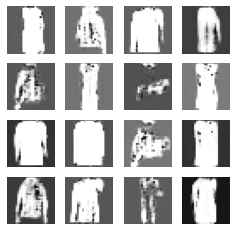

Time for epoch 19 is 91.70419836044312 sec


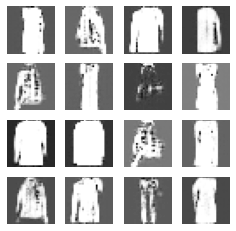

Time for epoch 20 is 91.76470446586609 sec


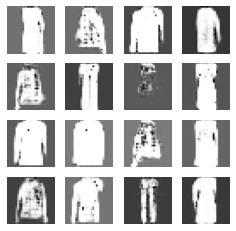

Time for epoch 21 is 91.72425675392151 sec


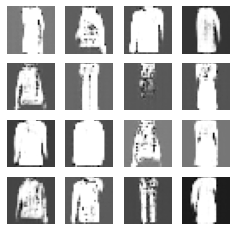

Time for epoch 22 is 91.50813174247742 sec


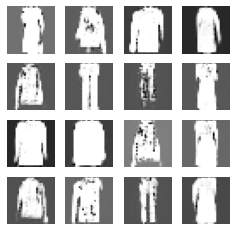

Time for epoch 23 is 91.60184669494629 sec


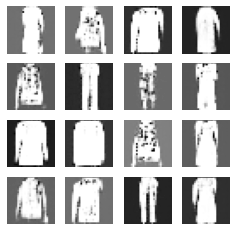

Time for epoch 24 is 91.69568252563477 sec


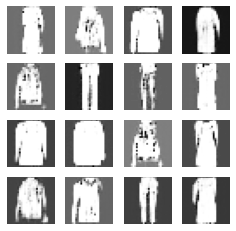

Time for epoch 25 is 91.60864162445068 sec


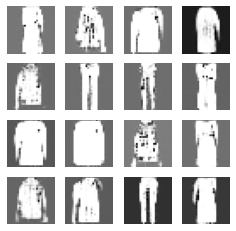

Time for epoch 26 is 91.53612208366394 sec


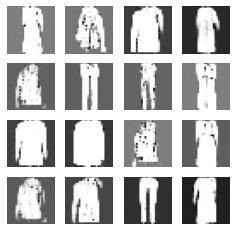

Time for epoch 27 is 91.53044605255127 sec


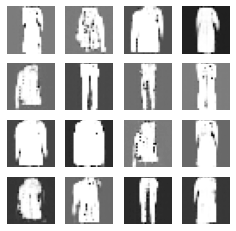

Time for epoch 28 is 91.55384373664856 sec


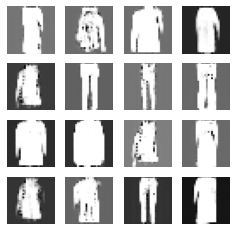

Time for epoch 29 is 91.88503551483154 sec


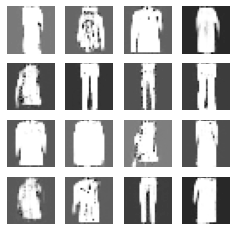

Time for epoch 30 is 91.71970820426941 sec


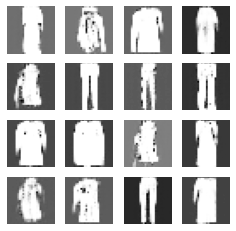

Time for epoch 31 is 91.63128018379211 sec


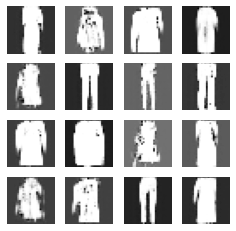

Time for epoch 32 is 91.78455758094788 sec


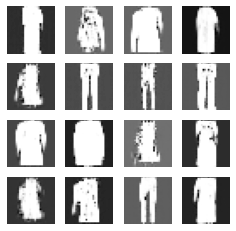

Time for epoch 33 is 91.62204480171204 sec


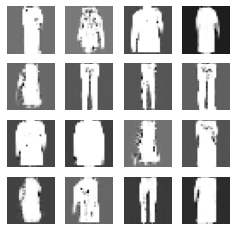

Time for epoch 34 is 91.84263706207275 sec


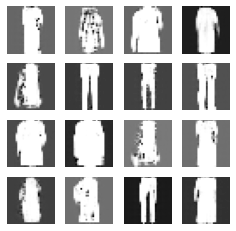

Time for epoch 35 is 91.75381660461426 sec


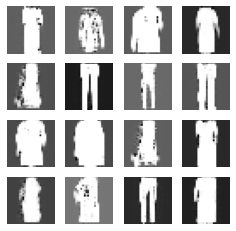

Time for epoch 36 is 91.70688319206238 sec


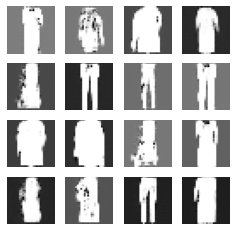

Time for epoch 37 is 91.72585034370422 sec


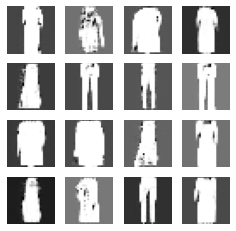

Time for epoch 38 is 91.90083575248718 sec


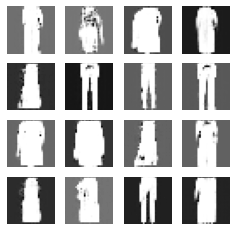

Time for epoch 39 is 91.70745992660522 sec


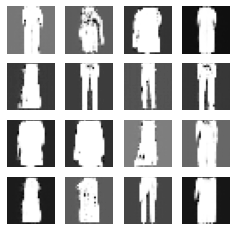

Time for epoch 40 is 91.62800478935242 sec


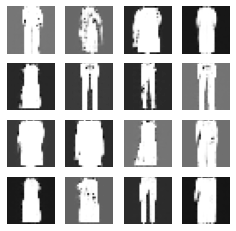

Time for epoch 41 is 91.6662929058075 sec


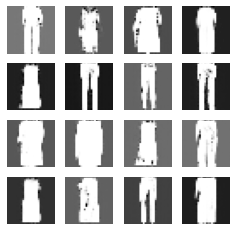

Time for epoch 42 is 91.89952516555786 sec


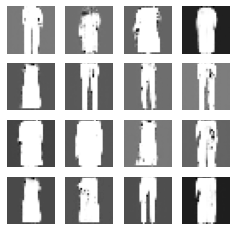

Time for epoch 43 is 91.58535051345825 sec


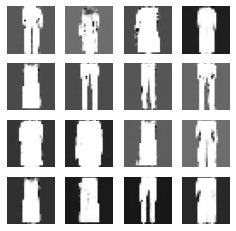

Time for epoch 44 is 91.65775680541992 sec


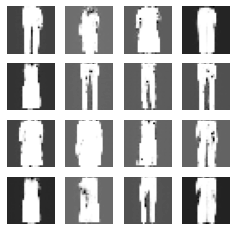

Time for epoch 45 is 91.80487108230591 sec


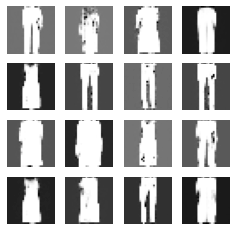

Time for epoch 46 is 91.6874189376831 sec


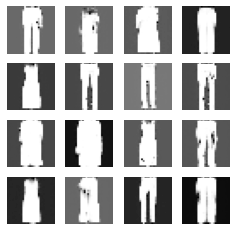

Time for epoch 47 is 91.8926112651825 sec


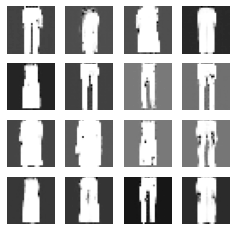

Time for epoch 48 is 91.63838410377502 sec


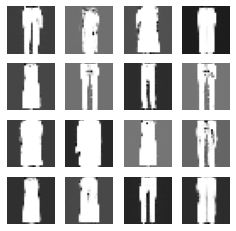

Time for epoch 49 is 91.4880576133728 sec


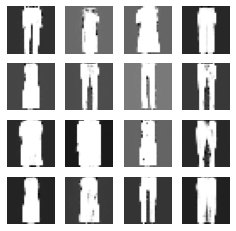

Time for epoch 50 is 91.50545597076416 sec


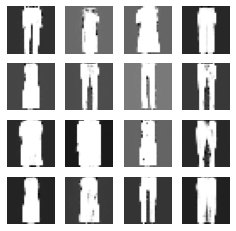

In [78]:
train(train_dataset, EPOCHS)